In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [7]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train', 'test_intel']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading seg_train


100%|██████████| 2382/2382 [00:03<00:00, 783.78it/s]


Loading test_intel


100%|██████████| 4/4 [00:00<00:00, 501.31it/s]


In [9]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [10]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 24
Each image is of size: (150, 150)


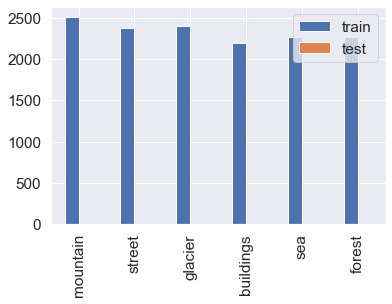

In [11]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

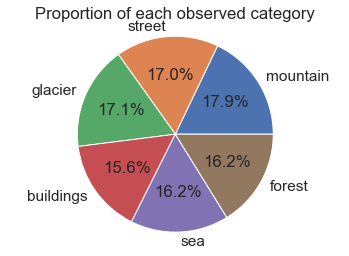

In [12]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

##Scale the Data

In [13]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [14]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

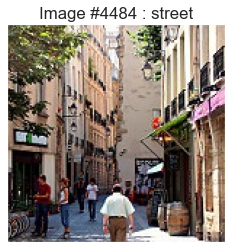

In [15]:
display_random_image(class_names, train_images, train_labels)

##Create Simple Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=7, validation_split = 0.2)

Epoch 1/7
88/88 [==============================] - 137s 2s/step - loss: 1.3367 - accuracy: 0.4551 - val_loss: 1.1151 - val_accuracy: 0.5515
Epoch 2/7
88/88 [==============================] - 141s 2s/step - loss: 1.0597 - accuracy: 0.5768 - val_loss: 0.9957 - val_accuracy: 0.6128
Epoch 3/7
88/88 [==============================] - 137s 2s/step - loss: 0.9139 - accuracy: 0.6400 - val_loss: 0.9498 - val_accuracy: 0.6359
Epoch 4/7
88/88 [==============================] - 133s 2s/step - loss: 0.8503 - accuracy: 0.6736 - val_loss: 0.8352 - val_accuracy: 0.6623
Epoch 5/7
88/88 [==============================] - 136s 2s/step - loss: 0.7817 - accuracy: 0.7004 - val_loss: 0.7873 - val_accuracy: 0.7050
Epoch 6/7
88/88 [==============================] - 131s 1s/step - loss: 0.7545 - accuracy: 0.7112 - val_loss: 0.7481 - val_accuracy: 0.7211
Epoch 7/7
88/88 [==============================] - 134s 2s/step - loss: 0.6996 - accuracy: 0.7333 - val_loss: 0.7206 - val_accuracy: 0.7353


In [19]:
model.save("Intel_Long_Model.h5py")

INFO:tensorflow:Assets written to: Intel_Long_Model.h5py\assets
